In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using JLD2, Plots

In [3]:
using Base: @kwdef

In [4]:
using Random: AbstractRNG

In [5]:
using Statistics: mean

In [6]:
@kwdef struct Args
	nodes::Int = 20
	p_edge::Real = 0.1
	d_vsa::Int = 1024
	rng::AbstractRNG
end

Args

In [7]:
file = "data/" * "result_2023-09-26T21:34:11.683.jld2"

"data/result_2023-09-26T21:34:11.683.jld2"

In [33]:
file2 = "data/" * "result_2023-09-29T16:29:42.502.jld2"

"data/result_2023-09-29T16:29:42.502.jld2"

In [34]:
data = load_object(file)
data2 = load_object(file2);

In [35]:
args_1 = data[1][2];
args_2 = data2[1][2]; 

In [36]:
vals_1 = data[2][2];
vals_2 = data2[2][2];

In [37]:
args = vcat(args_1, args_2)
vals = vcat(vals_1, vals_2);

In [38]:
p_edges = [arg.p_edge for arg in args]
auroc_static = [val[1][1] for val in vals]
auroc_dynamic = [val[2][1] for val in vals];

In [39]:
auroc_static_avg = [val[1][1] for val in vals]
auroc_dynamic = [val[2][1] for val in vals];

In [40]:
function average_auroc(p_edges, args, vals)
    ps = sort!(unique(p_edges))
    
    function getmean(p)
        matches = map(x -> x.p_edge == p, args)
        auc = getindex.(vals[matches], 1)
        auc_mean = mean(auc)
        return auc_mean
    end

    return map(getmean, ps)
end

average_auroc (generic function with 1 method)

In [41]:
static_trend = average_auroc(p_edges, args, auroc_static)
dynamic_trend = average_auroc(p_edges, args, auroc_dynamic)

9-element Vector{Float64}:
 0.9995647611709456
 0.9867541369013657
 0.964952974778525
 0.9428366105063348
 0.9254992800583592
 0.905637104851307
 0.8887781882119028
 0.886636266810559
 0.8796944796290335

In [42]:
p_unique = sort!(unique(p_edges))

9-element Vector{Float64}:
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9

In [43]:
n_edges = p_edges .* [arg.nodes for arg in args] .^ 2;

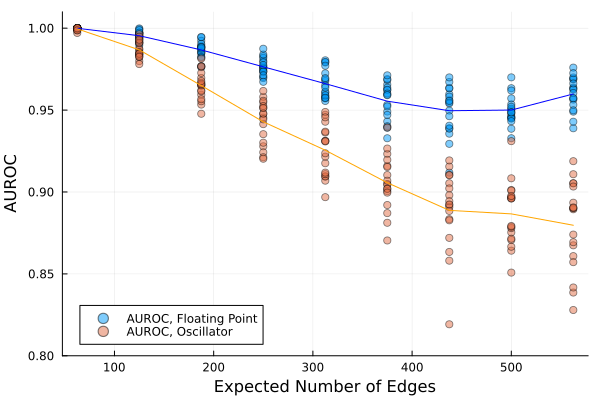

In [44]:
fig = scatter(n_edges, auroc_static, label="AUROC, Floating Point", alpha=0.5)
scatter!(n_edges, auroc_dynamic, label="AUROC, Oscillator", alpha=0.5)
plot!(p_unique .* 25^2, static_trend, label=missing, color="blue")
plot!(p_unique .* 25^2, dynamic_trend, label=missing, color="orange")
ylabel!("AUROC")
xlabel!("Expected Number of Edges")
ylims!(0.80, 1.01)

In [45]:
png(fig, "graph_compression.png")

"graph_compression.png"